In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from scipy.stats import skew, norm
from sklearn.metrics import mean_squared_error as metric

In [2]:
class PATH:
    data=''
    train=data+'Train.csv'
    test=data+'Test.csv'
    ss=data+'SampleSubmission.csv'

In [3]:
train=pd.read_csv(PATH.train)
test=pd.read_csv(PATH.test)
ss=pd.read_csv(PATH.ss)

In [7]:
train.head(10)

,ID_Zindi,Date,ID,LAT,LON,Precipitation,LST,AAI,CloudFraction,NO2_strat,NO2_total,NO2_trop,TropopausePressure,GT_NO2
0,ID_ENTGC7,1/1/2019,PD01,45.601585,11.903551,0.000000,NaN,0.230527,0.559117,0.000024,0.000117,NaN,14440.82126,31.0
1,ID_8JCCXC,1/1/2019,PD04,45.371005,11.840830,3.047342,NaN,-0.074006,0.869309,0.000024,0.000127,NaN,14441.79815,42.0
2,ID_V3136Z,1/1/2019,RO01,45.045825,12.060869,0.000000,NaN,0.024470,0.674160,0.000024,0.000086,NaN,14437.38294,31.0
3,ID_KRVZDJ,1/1/2019,RO02,45.104075,11.553241,1.200467,NaN,-0.010442,0.920054,0.000024,0.000124,NaN,14440.83831,30.0
4,ID_PR351A,1/1/2019,RO03,45.038758,11.790152,1.274564,NaN,-0.176178,0.747464,0.000024,0.000116,NaN,14438.79037,58.0
5,ID_4XN0K8,1/1/2019,TV01,45.889734,12.307124,0.000000,278.38,-0.366831,0.324392,0.000023,0.000109,NaN,14432.05624,26.0
6,ID_O0RJKX,1/1/2019,TV02,45.671721,12.237807,0.000000,NaN,0.188599,0.818422,0.000024,0.000135,NaN,14436.70176,38.0
7,ID_1APJEY,1/1/2019,VE01,45.629092,12.590682,0.000000,NaN,0.507837,0.926018,0.000024,0.000137,NaN,14435.01960,34.0
8,ID_4B1H1U,1/1/2019,VE02,45.499618,12.261249,0.000000,NaN,0.087363,0.835097,0.000024,0.000104,NaN,14438.51425,41.0
9,ID_3JD1GC,1/1/2019,VE03,45.428424,12.312930,0.650355,NaN,0.208678,0.812696,0.000024,0.000117,NaN,14437.71015,35.0


In [8]:
train.describe()

,LAT,LON,Precipitation,LST,AAI,CloudFraction,NO2_strat,NO2_total,NO2_trop,TropopausePressure,GT_NO2
count,86584.000000,86584.000000,86584.000000,46798.000000,73709.000000,73709.000000,73709.000000,73709.000000,51111.000000,73709.000000,82051.000000
mean,45.421456,10.014272,2.585528,299.268841,-1.274999,0.200606,0.000045,0.000156,0.000105,16655.112392,24.535051
std,0.225409,1.056637,7.617394,10.927167,0.693003,0.259607,0.000012,0.000103,0.000092,3000.748790,17.108838
min,44.924694,8.736497,0.000000,253.200000,-5.196266,0.000000,0.000013,-0.000012,-0.000025,8614.349685,0.000000
25%,45.249544,9.195325,0.000000,290.920000,-1.749425,0.023900,0.000034,0.000100,0.000047,14432.114060,11.875000
50%,45.478996,9.611738,0.000000,300.760000,-1.349746,0.078478,0.000047,0.000122,0.000071,16711.190570,20.000000
75%,45.601232,10.683357,0.000000,307.940000,-0.878857,0.278451,0.000056,0.000173,0.000129,19252.648570,33.050000
max,45.889734,12.590682,135.396805,327.840000,2.143020,1.000000,0.000073,0.002047,0.001097,24449.007150,188.233333


In [9]:
train.describe(include='object')

,ID_Zindi,Date,ID
count,86584,86584,86584
unique,86582,1096,79
top,ID_ZHFIGQ,1/1/2019,PD01
freq,2,79,1096


# Categorical Exploring

In [6]:
num_cols =test.select_dtypes(include =('number')).columns.tolist()
cat_cols =test.select_dtypes(exclude =('number')).columns.tolist()
print('Numerical columns counts :',len(num_cols))
print('Categorical columns counts :',len(cat_cols))
print(cat_cols)

Numerical columns counts : 10
Categorical columns counts : 3
['ID_Zindi', 'Date', 'ID']


## interactions :

In [7]:
for column in cat_cols:
    print(50*'-',column,50*'-',sep='  ')
    print('Train uniques: ',train[column].nunique())
    print('Test uniques: ',test[column].nunique())
    #print('all data uniques: ',df[column].nunique())

--------------------------------------------------  ID_Zindi  --------------------------------------------------
Train uniques:  86582
Test uniques:  6576
--------------------------------------------------  Date  --------------------------------------------------
Train uniques:  1096
Test uniques:  1096
--------------------------------------------------  ID  --------------------------------------------------
Train uniques:  79
Test uniques:  6


In [15]:
train.groupby('ID').ID_Zindi.count(),test.groupby('ID').ID_Zindi.count()

(ID
 PD01     1096
 PD04     1096
 RO01     1096
 RO02     1096
 RO03     1096
          ... 
 X9897    1096
 X9928    1096
 X9969    1096
 X9993    1096
 X9999    1096
 Name: ID_Zindi, Length: 79, dtype: int64,
 ID
 PD03     1096
 TV03     1096
 X5561    1096
 X5953    1096
 X6701    1096
 X6877    1096
 Name: ID_Zindi, dtype: int64)

In [25]:
for column in cat_cols:
    print(50*'-',column,50*'-',sep='  ')
    interaction =len(set(train[column].unique()).intersection(\
    set(test[column].unique())))
    if interaction>0:
        print(f'there is an interaction,about {interaction} interactions')
    else:
        print('NO INTERACTION,DROP THIS COLUMN')

--------------------------------------------------  ID_Zindi  --------------------------------------------------
NO INTERACTION,DROP THIS COLUMN
--------------------------------------------------  Date  --------------------------------------------------
there is an interaction,about 1096
--------------------------------------------------  ID  --------------------------------------------------
NO INTERACTION,DROP THIS COLUMN


In [23]:
train.Date=pd.to_datetime(train.Date,format='mixed')
test.Date=pd.to_datetime(test.Date,format='mixed')

* # ***every id has the same uniques value***

# Data Visualizing and correlations

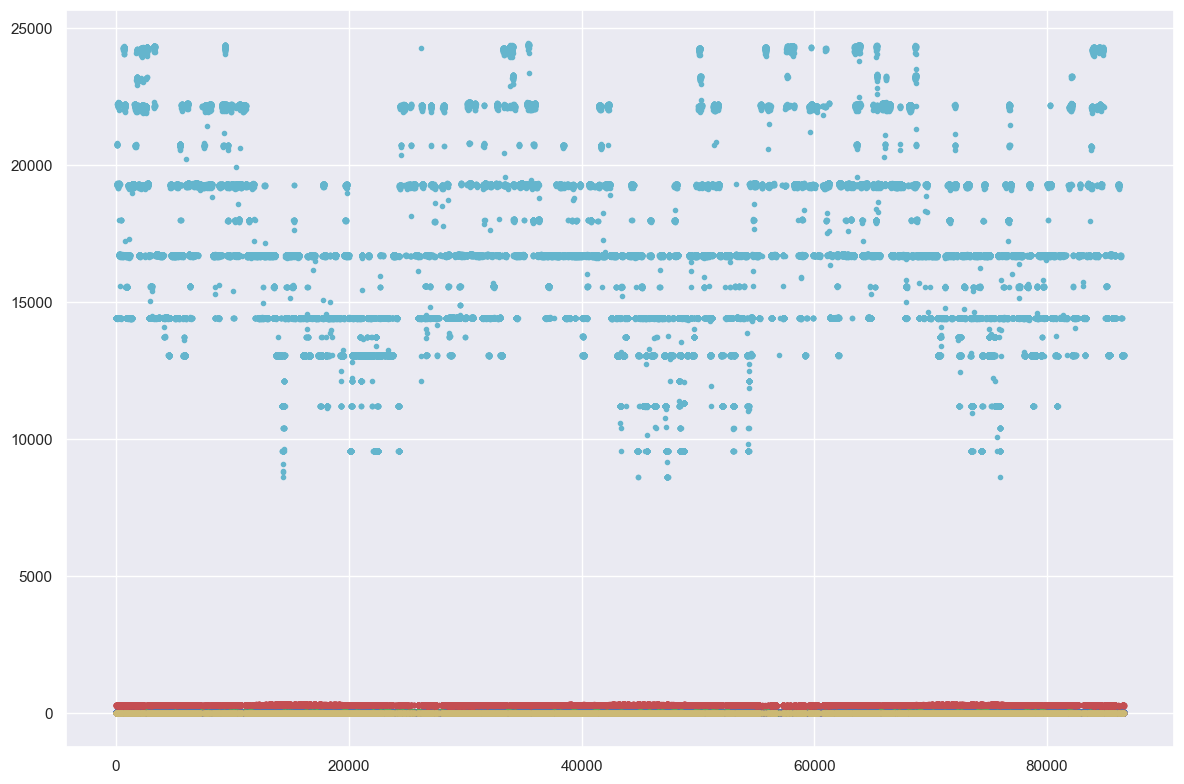

In [68]:
num_cols = test.select_dtypes(include=['number']).columns.tolist()

fig,ax =plt.subplots(figsize=(12,8))
ax.plot(train[num_cols],'.')

plt.tight_layout()
plt.show()

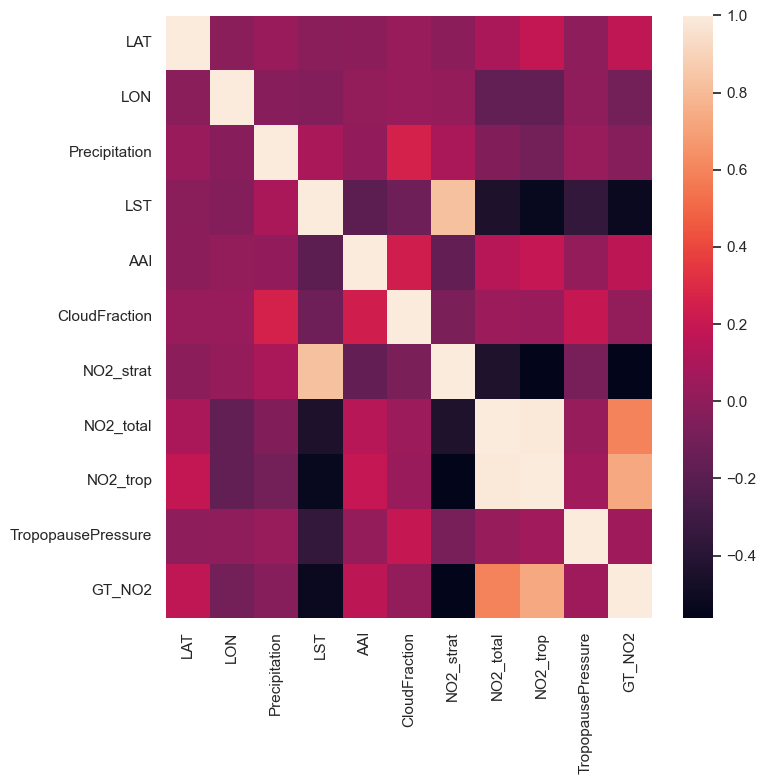

In [69]:
fig,ax =plt.subplots(figsize=(8,8))
sns.heatmap(train[num_cols+['GT_NO2']].corr(),ax =ax)

plt.tight_layout()
plt.show()

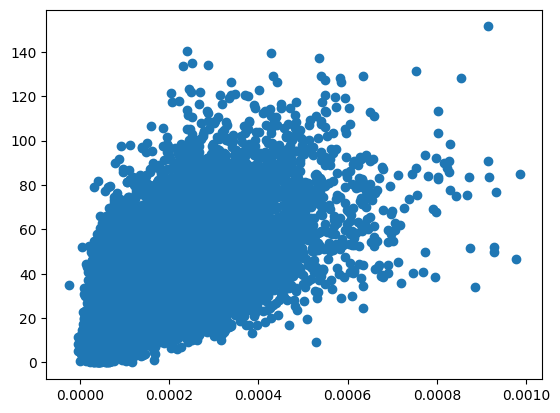

In [47]:
plt.scatter(train.NO2_trop,train.GT_NO2)

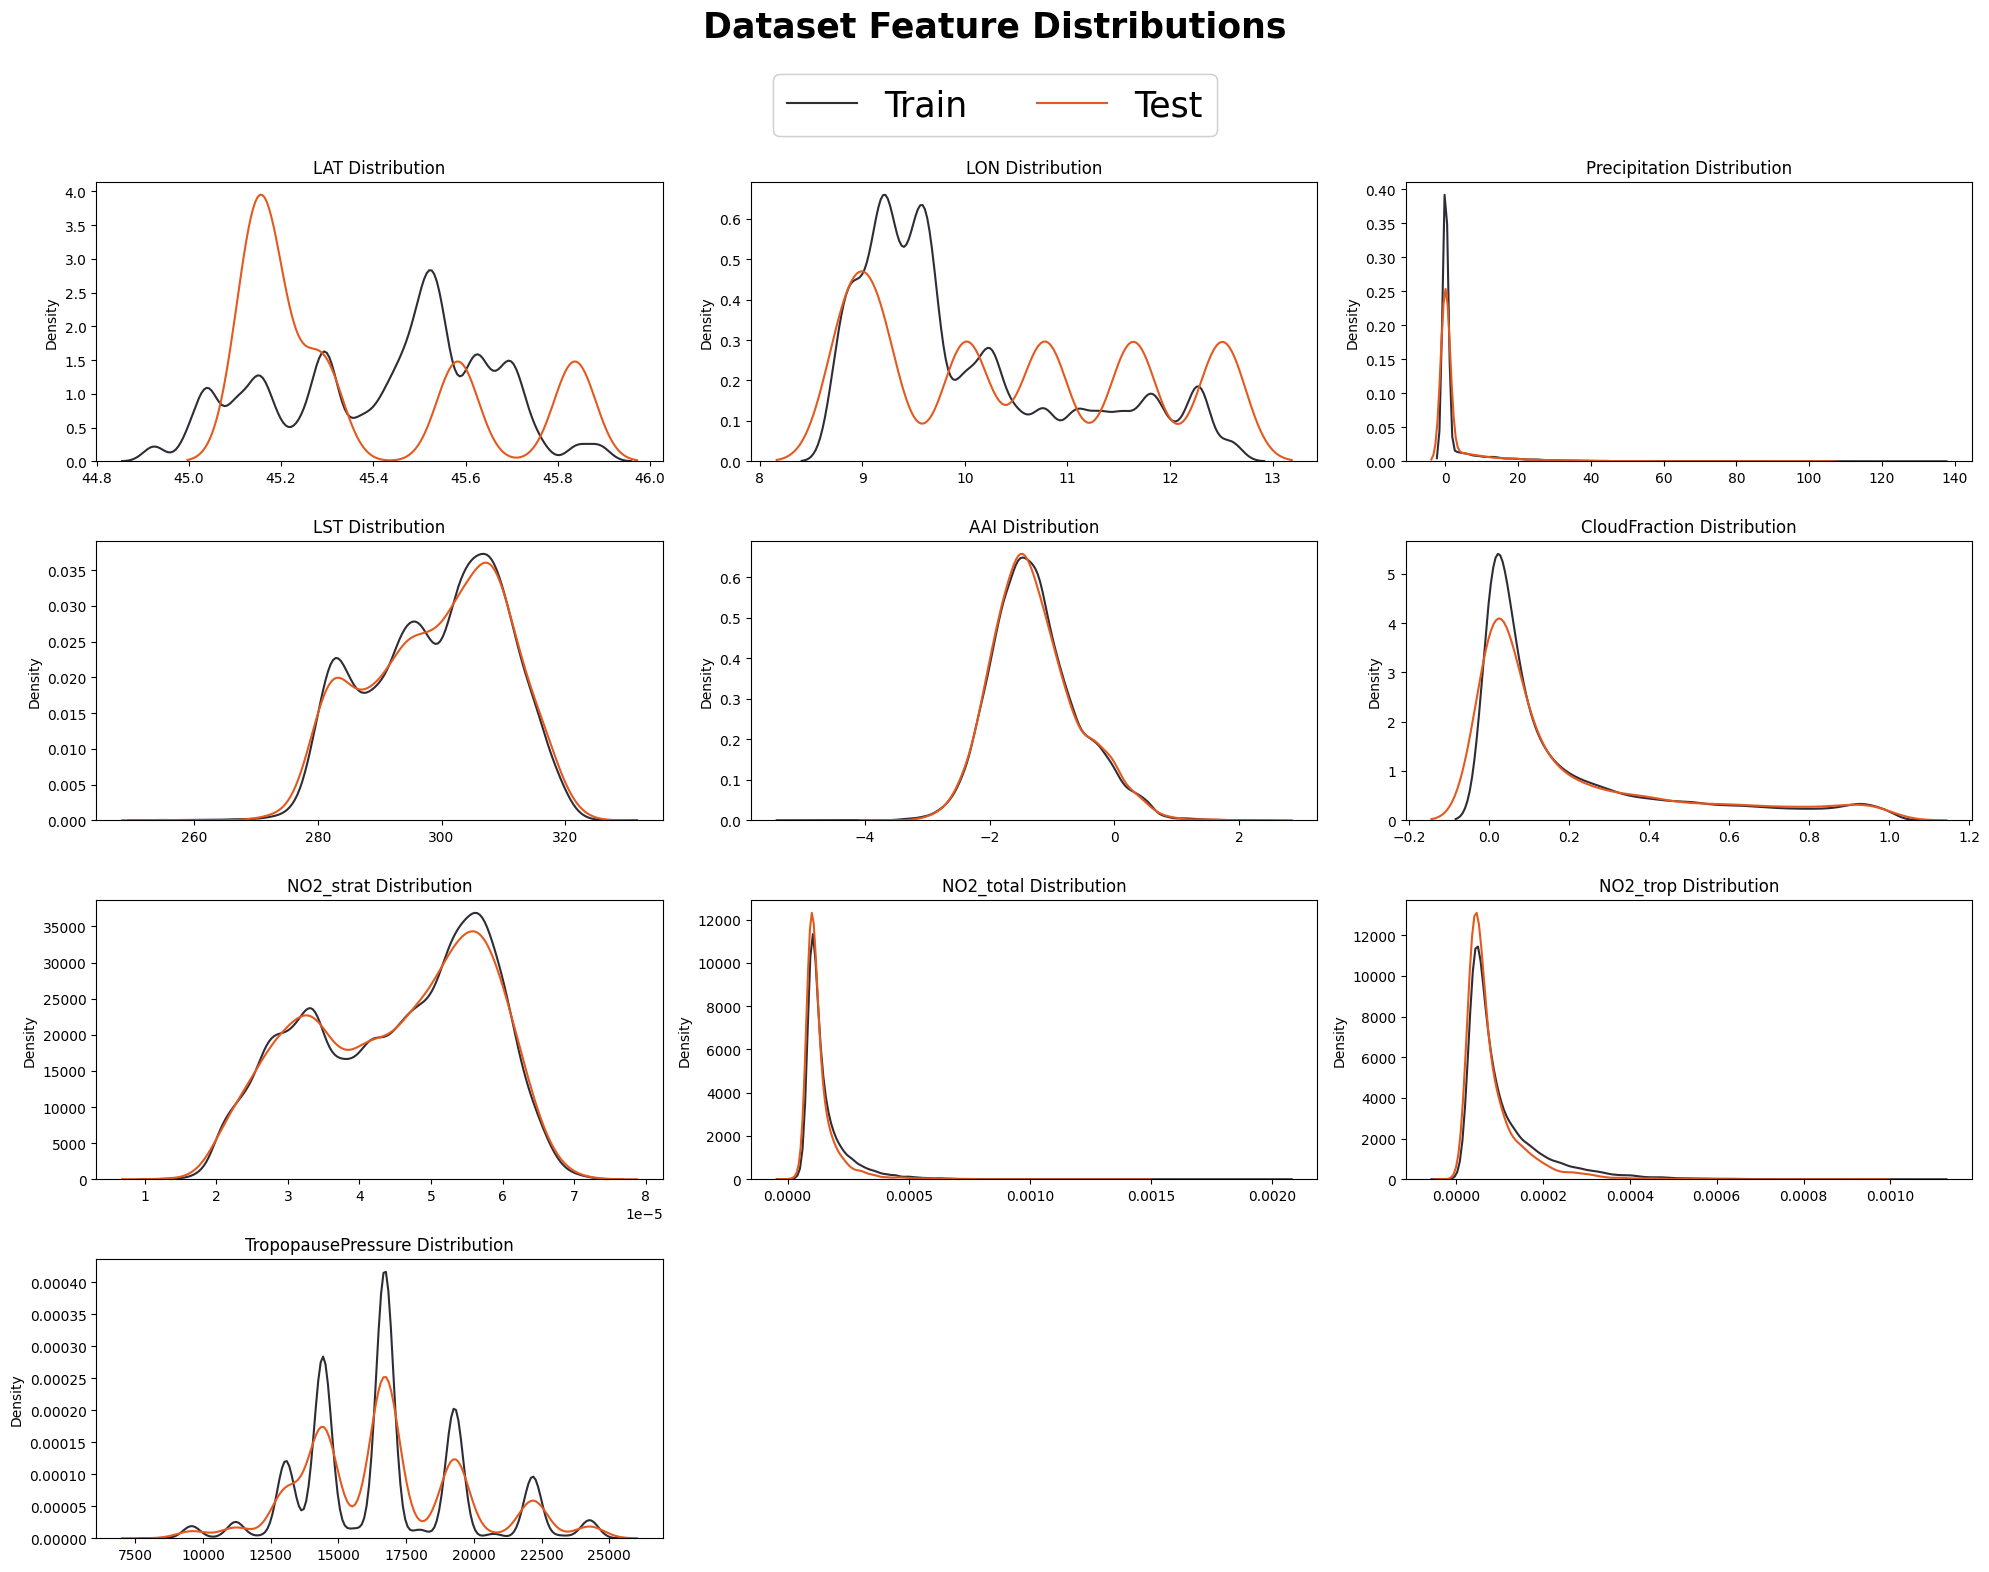

In [23]:
# kudos to @jcaliz
import math
palette = ['#302c36', '#037d97', '#E4591E', '#C09741', '#EC5B6D', '#90A6B1', '#6ca957', '#D8E3E2']
features = num_cols
n_bins = 50
histplot_hyperparams = { 'kde':True, 'alpha':0.4, 'stat':'percent', 'bins':n_bins }
columns = features
n_cols = 3
n_rows = math.ceil(len(columns)/n_cols)
fig, ax = plt.subplots(n_rows, n_cols, figsize=(20, n_rows*4))
ax = ax.flatten()
for i, column in enumerate(columns):
    plot_axes = [ax[i]]
    sns.kdeplot( train[column], label='Train',
                ax=ax[i], color=palette[0] )
    sns.kdeplot( test[column], label='Test',
                ax=ax[i], color=palette[2] )
    # titles
    ax[i].set_title(f'{column} Distribution');
    ax[i].set_xlabel(None)
    # remove axes to show only one at the end
    plot_axes = [ax[i]]
    handles = []
    labels = []
    for plot_ax in plot_axes:
        handles += plot_ax.get_legend_handles_labels()[0]
        labels += plot_ax.get_legend_handles_labels()[1]
        plot_ax.legend().remove()
for i in range(i+1, len(ax)):
    ax[i].axis('off')
    fig.suptitle(f'Dataset Feature Distributions\n\n\n', ha='center', fontweight='bold', fontsize=25)
    fig.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, 0.95), fontsize=25, ncol=3)
    plt.tight_layout()

plt.show()

# Target Exploring :

C:\Users\Administrator\AppData\Local\Temp\ipykernel_4436\3330486169.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train.GT_NO2 ,



 mu = 24.54 and sigma = 17.11



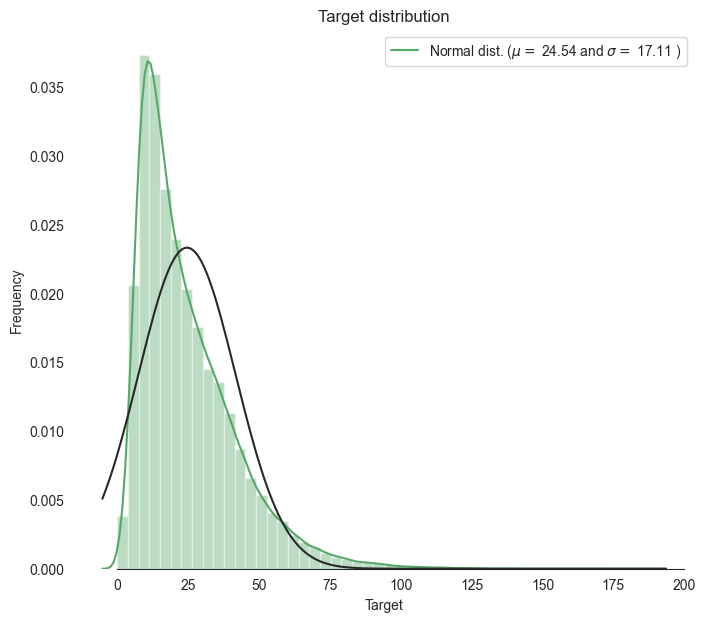

In [16]:
sns.set_style("white")
sns.set_color_codes(palette='deep')
f, ax = plt.subplots(figsize=(8, 7))
#Check the new distribution
sns.distplot(train.GT_NO2 ,
            fit=norm,
            color="g",
           );

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(train.GT_NO2.dropna())
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
ax.xaxis.grid(False)
ax.set(ylabel="Frequency")
ax.set(xlabel="Target")
ax.set(title="Target distribution")
sns.despine(trim=True, left=True)

plt.show()

In [44]:
indexes=train[train.GT_NO2>train.GT_NO2.quantile(0.99)].index
train[train.GT_NO2>train.GT_NO2.quantile(0.99)].ID.value_counts()

ID
X5504     116
X5507      91
X5547      79
X5532      67
X9877      62
X5517      55
X6781      53
X5531      45
X5542      37
X10279     36
X9999      24
X5534      22
X5545      19
X5609      16
X5595      15
X5587      11
X5549      10
X6859       9
RO03        8
X17286      7
X5557       7
X20495      4
X5579       4
X5586       3
VE01        2
X6813       2
X5965       2
X5958       2
X5554       2
X5568       2
VE02        1
VE03        1
X5599       1
X10038      1
X10507      1
X30163      1
X6871       1
X10331      1
Name: count, dtype: int64

In [46]:
test.ID.value_counts()

ID
PD03     1096
TV03     1096
X5561    1096
X5953    1096
X6701    1096
X6877    1096
Name: count, dtype: int64

In [37]:
train.Date=pd.to_datetime(train.Date,format='mixed')
train.groupby(['ID','Date']).LST.count().head(80)

ID    Date      
PD01  2019-01-01    0
      2019-01-02    0
      2019-01-03    0
      2019-01-04    1
      2019-01-05    1
      2019-01-06    1
      2019-01-07    1
      2019-01-08    1
      2019-01-09    1
      2019-01-10    1
      2019-01-11    1
      2019-01-12    0
      2019-01-13    1
      2019-01-14    1
      2019-01-15    1
      2019-01-16    1
      2019-01-17    0
      2019-01-18    0
      2019-01-19    0
      2019-01-20    1
      2019-01-21    0
      2019-01-22    1
      2019-01-23    0
      2019-01-24    1
      2019-01-25    1
      2019-01-26    0
      2019-01-27    0
      2019-01-28    0
      2019-01-29    1
      2019-01-30    0
      2019-01-31    1
      2019-02-01    1
      2019-02-02    0
      2019-02-03    1
      2019-02-04    0
      2019-02-05    1
      2019-02-06    1
      2019-02-07    0
      2019-02-08    0
      2019-02-09    0
      2019-02-10    0
      2019-02-11    0
      2019-02-12    0
      2019-02-13    1
      2019-02-1

In [34]:
pd.set_option('display.max_rows',100)